What is the purpose of our web app we're developing? 
Were creating a webb app to view the inventory of a car delership in an interactive way. 

Lets start with importing and analying the data 

\

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np 
import streamlit as st
import plotly.express as px
import altair as al 
import matplotlib.pyplot as plt
plt.ion()


In [4]:
car_ad_df = pd.read_csv("/Users/macos/Downloads/vehicles_us.csv")

print(car_ad_df.sample(10))



       price  model_year                 model  condition  cylinders    fuel  \
27243   4250      2009.0            ford focus  excellent        4.0     gas   
1753   15989      2016.0           kia sorento  excellent        4.0     gas   
48711   4450      2006.0          jeep liberty       good        6.0     gas   
22058   8500      2001.0       gmc sierra 1500  excellent        8.0     gas   
12519   3500      2003.0            ford f-150       good        6.0     gas   
6699    3000      2000.0  ford f250 super duty       good        8.0  diesel   
12476  11988      2015.0       chevrolet cruze   like new        4.0     gas   
41570  38900      2018.0         ford explorer   like new        6.0     gas   
31321  28500      2013.0         jeep wrangler  excellent        6.0     gas   
23198  12995      2013.0         dodge charger   like new        8.0     gas   

       odometer transmission   type paint_color  is_4wd date_posted  \
27243       NaN    automatic  sedan       black 

In [5]:
print(car_ad_df.describe())
print(car_ad_df.info())

               price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column      

In [6]:
print(car_ad_df['type'].unique())

['SUV' 'pickup' 'sedan' 'truck' 'coupe' 'van' 'convertible' 'hatchback'
 'wagon' 'mini-van' 'other' 'offroad' 'bus']


#SDA analysis & questions 

How many cars under 1ook miles are in excellent condition? 
How many cars fit this crtieria: the model year 2010 and over, are an automatic transmission, are a truck, suv, or pickup? 
Whats the average amount of days convertibles are listed? 

Hypothesis: there are more cars under 100k miles that are in excellent condition. 
theory: there is more cars under 100k miles in excellent condition. 

#these questions are sample questions to be answered using SDA; histograms, bar plots, visualivation of data. 

Question 1.) How many cars over 100k miles are in excelllent condition? 

In [7]:
print(car_ad_df.sample(5))

       price  model_year                     model  condition  cylinders fuel  \
26638  14999      2009.0        chevrolet suburban       good        8.0  gas   
29821   5299      2014.0                ford focus       good        4.0  gas   
26172   3495      2002.0             nissan sentra  excellent        4.0  gas   
18024  15995      2016.0              nissan rogue  excellent        4.0  gas   
157    26700      2017.0  ford mustang gt coupe 2d       good        8.0  gas   

       odometer transmission   type paint_color  is_4wd date_posted  \
26638  140231.0    automatic    SUV       black     1.0  2019-02-24   
29821  130455.0    automatic  sedan       white     NaN  2019-03-30   
26172  139537.0    automatic  sedan         red     NaN  2018-07-23   
18024   18000.0    automatic    SUV         NaN     NaN  2018-12-18   
157     26192.0        other  coupe       black     NaN  2019-02-14   

       days_listed  
26638           34  
29821           23  
26172           32  
18

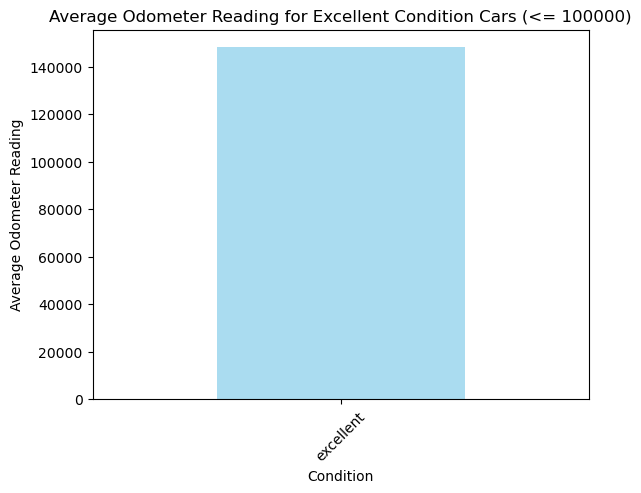

In [8]:
under_50 = car_ad_df[(car_ad_df['condition'] == 'excellent') & (car_ad_df['odometer'] >= 100000)]

grouped = under_50.groupby('condition')['odometer'].mean()

# Step 3: Plot the bar chart
grouped.plot(kind='bar', alpha=0.7, color='skyblue')
plt.title('Average Odometer Reading for Excellent Condition Cars (<= 100000)')
plt.xlabel('Condition')
plt.ylabel('Average Odometer Reading')
plt.xticks(rotation=45)
plt.show()





price  model_year  model                 condition  cylinders  fuel    odometer  transmission  type   paint_color  is_4wd  date_posted  days_listed  manufacturer
1      2010.0      ford f350 super duty  excellent  8.0        diesel  139486.0  automatic     truck  black        1.0     2018-11-18   9            ford            1
       2015.0      ram 2500              excellent  6.0        diesel  103549.0  automatic     truck  red          1.0     2018-07-31   45           ram             1
14900  2013.0      ford explorer         excellent  6.0        gas     103540.0  automatic     SUV    white        1.0     2019-02-13   25           ford            1
       2015.0      buick enclave         excellent  6.0        gas     104714.0  automatic     SUV    silver       1.0     2018-09-05   43           buick           1
       2016.0      chevrolet equinox     excellent  6.0        gas     108180.0  automatic     sedan  blue         1.0     2018-08-06   30           chevrolet       1
   

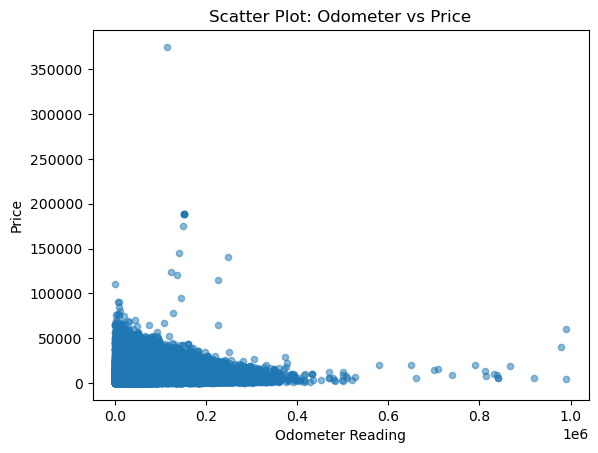

In [27]:
#the actual value count for excellent condition cars over 100k miles
cars_under100 = car_ad_df[(car_ad_df['condition'] == 'excellent') & (car_ad_df['odometer'] >= 100000)].value_counts()

print(cars_under100)


# Create a scatter plot for 'odometer' vs 'price'
car_ad_df.plot(kind='scatter', x='odometer', y='price', alpha=0.5)

# Optional: Add titles and labels
plt.title('Scatter Plot: Odometer vs Price')
plt.xlabel('Odometer Reading')
plt.ylabel('Price')

# Display the plot
plt.show()


Question 1.) How many cars over 100k miles are in excelllent condition? 
Answer: there are 4,096 cars that are over 100k miles & in excellent condition out of the 51,525 cars in our database.

Question 2.) How many cars fit this crtieria: the model year 2010 and over, are a manual transmission, are a truck, suv, or pickup?

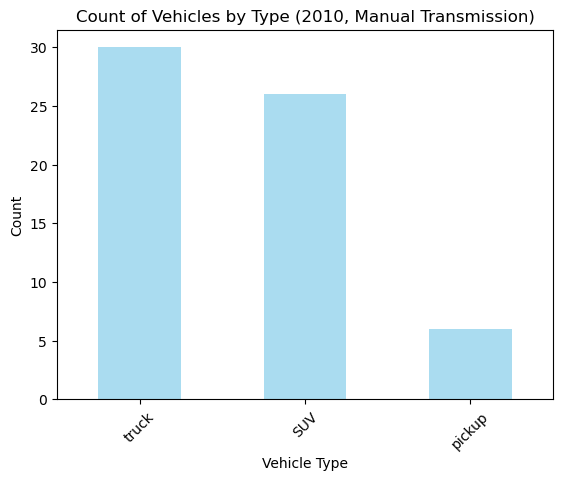

In [10]:
cars_q2 = car_ad_df[
    (car_ad_df['model_year'] == 2010) & 
    (car_ad_df['transmission'] == 'manual') & 
    (car_ad_df['type'].isin(['SUV', 'truck', 'pickup']))
]

type_counts = cars_q2['type'].value_counts()

# Plot a bar chart
type_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Count of Vehicles by Type (2010, Manual Transmission)')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [11]:
print(cars_q2.shape[0])

62


Question 2.) How many cars fit this crtieria: the model year 2010 and over, are a manual transmission, are a truck, suv, or pickup?
Answer: There are 62 cars in our database that fit this criteria. 

Question 3.) What's the average amount of days convertibles are listed? 


In [12]:
cars_q3 = car_ad_df[car_ad_df['type'] == 'convertible'] 
cars_q3_av = cars_q3['days_listed'].mean()

print(cars_q3_av)



39.19282511210762


Question 3.) What's the average amount of days convertibles are listed? 
Answer: Convertible cars are listed in the database for an average of 39 days. 

In [13]:
print(car_ad_df['price'].sample(5))

44100     1900
37452    14999
4664      3700
20717     5500
8846      5200
Name: price, dtype: int64


Question 4.) Hypothesis: there are more cars under 100k miles that are in excellent condition. 
theory: there is more cars under 100k miles in excellent condition. 

In [14]:
#cars under 100k variable under_50

# make a second cariable for the average mileages on this variable 

#cars_under_avr


alpha = 0.05 



In [15]:
car_under_avr = under_50['odometer'].mean()
print(car_under_avr)

148227.88414851838


In [16]:
from scipy import stats as st
import numpy as np

In [17]:
under_50_numeric = under_50['odometer'] 
under_50_clean = under_50_numeric.dropna()


In [18]:
# Running a t-test to test my hypothesis 

results_cars = st.ttest_1samp(under_50_clean, car_under_avr)
# use the method st.ttest_1samp

print('p-value:', results_cars.pvalue / 2)

if (results_cars.pvalue /2 < alpha) and (under_50_numeric.mean() < car_under_avr):
    print(
        "We reject the null hypothesis: there is more cars under 100k miles in excellent condition."
    )
else:
    print(
        "We can't reject the null hypothesis: there is more cars under 100k miles in excellent condition."
    )

p-value: 0.5
We can't reject the null hypothesis: there is more cars under 100k miles in excellent condition.


In [19]:
print(cars_under100.head())

price  model_year  model                 condition  cylinders  fuel    odometer  transmission  type   paint_color  is_4wd  date_posted  days_listed
1      2010.0      ford f350 super duty  excellent  8.0        diesel  139486.0  automatic     truck  black        1.0     2018-11-18   9              1
       2015.0      ram 2500              excellent  6.0        diesel  103549.0  automatic     truck  red          1.0     2018-07-31   45             1
14900  2013.0      ford explorer         excellent  6.0        gas     103540.0  automatic     SUV    white        1.0     2019-02-13   25             1
       2015.0      buick enclave         excellent  6.0        gas     104714.0  automatic     SUV    silver       1.0     2018-09-05   43             1
       2016.0      chevrolet equinox     excellent  6.0        gas     108180.0  automatic     sedan  blue         1.0     2018-08-06   30             1
Name: count, dtype: int64


Question 4.) Hypothesis: there are more cars under 100k miles that are in excellent condition. 
theory: there is more cars under 100k miles in excellent condition. 

Answer: We can't reject the null hypothesis: there is more cars under 100k miles in excellent condition.

In [ ]:
##WebAppCode
###


import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from PIL import Image

#############
# Page Title
############

image = Image.open('/Users/macos/Downloads/JOJO’s DEALER LIST.png')

st.markdown("""
#Our Car Dealership 
         a simple sda project on a car dealership
         
         
         """)

##################

df = pd.read_csv('/Users/macos/Downloads/vehicles_us.csv')
df['manufacturer'] = df['model'].apply(lambda x: x.split()[0])

st.header('Data viewer')
show_manuf_1k_ads = st.checkbox('Include manufacturers with less than 1000 ads')
if not show_manuf_1k_ads:
    df = df.groupby('manufacturer').filter(lambda x: len(x) > 1000)

st.dataframe(df)
st.header('Vehicle types by manufacturer')
st.write(px.histogram(df, x='manufacturer', color='type'))
st.header('Histogram of `condition` vs `model_year`')

# -------------------------------------------------------
# histograms in plotly:
# fig = go.Figure()
# fig.add_trace(go.Histogram(x=df[df['condition']=='good']['model_year'], name='good'))
# fig.add_trace(go.Histogram(x=df[df['condition']=='excellent']['model_year'], name='excellent'))
# fig.update_layout(barmode='stack')
# st.write(fig)
# works, but too many lines of code
# -------------------------------------------------------

# histograms in plotly_express:
st.write(px.histogram(df, x='model_year', color='condition'))
# a lot more concise!
# -------------------------------------------------------

st.header('Compare price distribution between manufacturers')
manufac_list = sorted(df['manufacturer'].unique())
manufacturer_1 = st.selectbox('Select manufacturer 1',
                              manufac_list, index=manufac_list.index('chevrolet'))

manufacturer_2 = st.selectbox('Select manufacturer 2',
                              manufac_list, index=manufac_list.index('hyundai'))
mask_filter = (df['manufacturer'] == manufacturer_1) | (df['manufacturer'] == manufacturer_2)
df_filtered = df[mask_filter]
normalize = st.checkbox('Normalize histogram', value=True)
if normalize:
    histnorm = 'percent'
else:
    histnorm = None
st.write(px.histogram(df_filtered,
                      x='price',
                      nbins=30,
                      color='manufacturer',
                      histnorm=histnorm,
                      barmode='overlay'))

########
#New Web App Function 
########
data_comp = {
    'model_year': df['model_year'],
    'odometer' : df['odometer']


}

df_comp = pd.DataFrame(data_comp)

# Streamlit App
st.header('Compare Vehicle Year to Mileage')


# Dropdown for selecting vehicle year
veh_list = sorted(df_comp['model_year'].unique())
selected_year = st.selectbox('Select vehicle year', veh_list)

# Filter the data for the selected year
filtered_df_comp = df_comp[df_comp['model_year'] == selected_year]

# Display filtered data
st.subheader(f"Vehicles from year {selected_year}")
st.write(filtered_df_comp)

# Categorize and display odometer readings
st.subheader("Mileage Categories")
for index, row in filtered_df_comp.iterrows():
    mileage = row['odometer']
    if mileage <= 10000:
        st.write(f"Vehicle with mileage {mileage} miles: **Under 10k**")
    elif mileage <= 35000:
        st.write(f"Vehicle with mileage {mileage} miles: **Under 35k**")
    elif mileage <= 50000:
        st.write(f"Vehicle with mileage {mileage} miles: **Under 50k**")
    elif mileage <= 75000:
        st.write(f"Vehicle with mileage {mileage} miles: **Under 75k**")  
    elif mileage <= 100000:
        st.write(f"Vehicle with mileage {mileage} miles: **Under 100k**")      
    else:
        st.write(f"Vehicle with mileage {mileage} miles: **Above 100k**")



###New Web Function###




# Streamlit App
st.title("Vehicle Database Analysis")

# Dropdown for selecting vehicle type
vehicle_types_ = df['type'].unique()
selected_type_ = st.selectbox("Select Vehicle Type", vehicle_types_, index=0)

# Filter the DataFrame based on the selected type
filtered_df_no = df[df['type'] == selected_type_]

# Display filtered data
st.subheader(f"Vehicles of type '{selected_type_}'")
st.write(filtered_df_no)

# Create a bar chart to display the count of vehicles for each model year
st.subheader("Vehicle Count by Model Year")
if not filtered_df_no.empty:
    vehicle_count = filtered_df_no['model_year'].value_counts().reset_index()
    vehicle_count.columns = ['model_year', 'count']

    # Plot using Plotly
    fig = px.bar(
        vehicle_count,
        x='model_year',
        y='count',
        title=f"Number of {selected_type_}s by Model Year",
        labels={'model_year': 'Model Year', 'count': 'Number of Vehicles'},
    )
    st.plotly_chart(fig)
else:
    st.write(f"No vehicles of type '{selected_type_}' found in the database.")

    


In [ ]:
print(df.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
1    automatic  pickup       white     1.0  2018-10-19           50   
2    automatic   sedan         red     NaN  2019-02-07           79   
3    automatic  pickup         NaN     NaN  2019-03-22            9   
6    automatic   sedan       white     NaN  2018-12-27           73   
7    automatic     SUV       black     1.0  2019-01-07           68   

  manufacturer  
1         ford  
2      hyundai  
3         ford  
6       toyota  
7        honda  
